In [47]:
library(tidyverse)
library(tidytext)
library(glue)
library(stringr)
library(twitteR)
library(tm)

In [73]:
#connecting to twitter
Consumer_Key =  'ED99b65JDS0Oom12xb6lp8Xa1'
Consumer_Secret = 'fmFYDh7C1bBBKBpuRjODroPfxKMuFZRGkLuCtDuPfQpzszlrNm' 
Access_Token =  '3038136752-K34FhY5cWmi4BIIVlmTUDso0cOj1h0FrfimiGy4'
Access_Token_Secret =  'BR6817iYLOWP8jaPvJPnEqXgfyYUmYqX6Jf7nBKKfgMua'
setup_twitter_oauth(Consumer_Key,Consumer_Secret,Access_Token,Access_Token_Secret)

[1] "Using direct authentication"


ERROR: Error in check_twitter_oauth(): OAuth authentication error:
This most likely means that you have incorrectly called setup_twitter_oauth()'


# Importing all libraries for the sentiment analysis on twitter data

In [49]:
covid = searchTwitter('#covid-19 #coronavirus', n = 1000, lang = 'en')
#class(covid)
covid = twListToDF(covid)

# Using searchTwitter function to search for tweets in the twitter and converting tweets into a dataframe using twlisttodf function

In [50]:
write.csv(covid,"C:/Users/MANI/Documents/R sem 2/covid-19/covid.csv")

# writing into a csv file

In [51]:
pos <- get_sentiments("bing") %>% filter(sentiment == "positive")
neg <- get_sentiments("bing") %>% filter(sentiment == "negative")
class(pos)

[1] "tbl_df"     "tbl"        "data.frame"

# Getting seentiments from bing lexicons and storing in pos and neg

In [52]:
sentences <- covid$text

# Getting only text column from covid dataframe and storing in sentences

In [53]:
sentences = gsub('[^A-z ]','', sentences)

# removing all unknown special characters except A-z and replacing it with space

In [54]:
sentences = tolower(sentences)
sentences

[1] "rt eurekalert chinese case study suggests covid is not transmitted from pregnant mothers to newborns httpstcoqnnpqjdx via fron"            
   [2] "rt xposetrophyhunt straight from the us dept of agriculture yes the tiger caught the coronavirus from a keeper no evidence we can catc"    
   [3] "rt scotgov watch first minister nicolasturgeons message about prioritising the delivery of personal protective equipment to hospitals"     
   [4] "rt uncpublichealth to stop the spread of the coronavirus health officials have a favorite refrain after being in a city or region wher"    
   [5] "rt andyostroy what a great businessman he buys  fucking million doses of a drug he has no idea even works and what about the colossal"     
   [6] "rt complex pastor who criticized hysteria of coronavirus dies after testing positive for covid httpstcofscgiunn httpstc"                   
   [7] "rt pti_news number of novel coronavirus cases in haryana rises to  officials covid_"                                                       
   [8] "rt scotgov watch first minister nicolasturgeons message about prioritising the delivery of personal protective equipment to hospitals"     
   [9] "rt bsaaia the coronavirus aid relief and economic security cares act is the third federal legislation meant to address the covid"          
  [10] "rt scotgov update on coronavirus testingas of pm today  scottish tests have concluded confirmed negative positive"                         
  [11] "rt pti_news number of novel coronavirus cases in haryana rises to  officials covid_"                                                       
  [12] "to stop the spread of the coronavirus health officials have a favorite refrain after being in a city or region w httpstcovigcmibycs"       
  [13] "rt thecablestyle covid i get worried anytime my doctor husband leaves for work says chimamanda  thecable lifestyle httpstcoxwh"            
  [14] "rt complex pastor who criticized hysteria of coronavirus dies after testing positive for covid httpstcofscgiunn httpstc"                   
  [15] "rt publichealthpod across diverse countries that have disaggregated covid case data its consistent  men and women can both be i"           
  [16] "this is more than irresponsible americanleft coronavirus donaldtrump harvard impeachment politics tweet httpstcotoitajsu"                  
  [17] "rt sheerazraza tiger infected with coronavirus at us bronx zoo can animals pets spread covid  httpstcozphmric  covid_"                     
  [18] "rt tedlieu dear secpompeo fyi belowalso can you please use the official name covid or the unofficial name coronavirus in de"               
  [19] "rt forbescrypto bitcoin mining firm bitfury and ethereum mining firm coreweave have dedicated some of their powerful computers for coron"  
  [20] "rt sheerazraza tiger infected with coronavirus at us bronx zoo can animals pets spread covid  httpstcozphmric  covid_"                     
  [21] "covid updates globallytotal cases  dead  recovered  last updated april   httpstcoijmyxmln"                                                 
  [22] "rt bilalmahmooduk remember france punishing muslim women with hefty fines for covering their faces for keeping spiritual health just las"  
  [23] "rt transcendbuilds one hundred educators came together to define  problems we need to solve during and after coronavirus grantlichtman"    
  [24] "rt nst_online nstleader and sending mco offenders to the limited cells is only going to make prisons more overcrowded the novel coron"     
  [25] "rt cafinus canada is so canada sometimes that we play poutine hockeycoronavirus covid_"                                                    
  [26] "how water and wastewater utilities can handle cleanwateract regulatory issues amid covid via weforg httpstcosvmcrhxafe"                    
  [27] "exiled iranians supporters of mek in germany urge germanys chancellor to side with irans people amid httpstcorcjqrwciy"                    
  [28] 

# converting into lowercase 

In [55]:
word_list = str_split(sentences, '\\s+')

# Splitting the sentences using str_split

In [56]:
word_list

[[1]]
 [1] "rt"               "eurekalert"       "chinese"          "case"            
 [5] "study"            "suggests"         "covid"            "is"              
 [9] "not"              "transmitted"      "from"             "pregnant"        
[13] "mothers"          "to"               "newborns"         "httpstcoqnnpqjdx"
[17] "via"              "fron"            

[[2]]
 [1] "rt"              "xposetrophyhunt" "straight"        "from"           
 [5] "the"             "us"              "dept"            "of"             
 [9] "agriculture"     "yes"             "the"             "tiger"          
[13] "caught"          "the"             "coronavirus"     "from"           
[17] "a"               "keeper"          "no"              "evidence"       
[21] "we"              "can"             "catc"           

[[3]]
 [1] "rt"              "scotgov"         "watch"           "first"          
 [5] "minister"        "nicolasturgeons" "message"         "about"          
 [9] "prioritising"    "the"             "delivery"        "of"             
[13] "personal"        "protective"      "equipment"       "to"             
[17] "hospitals"      

[[4]]
 [1] "rt"              "uncpublichealth" "to"              "stop"           
 [5] "the"             "spread"          "of"              "the"            
 [9] "coronavirus"     "health"          "officials"       "have"           
[13] "a"               "favorite"        "refrain"         "after"          
[17] "being"           "in"              "a"               "city"           
[21] "or"              "region"          "wher"           

[[5]]
 [1] "rt"          "andyostroy"  "what"        "a"           "great"      
 [6] "businessman" "he"          "buys"        "fucking"     "million"    
[11] "doses"       "of"          "a"           "drug"        "he"         
[16] "has"         "no"          "idea"        "even"        "works"      
[21] "and"         "what"        "about"       "the"         "colossal"   

[[6]]
 [1] "rt"               "complex"          "pastor"           "who"             
 [5] "criticized"       "hysteria"         "of"               "coronavirus"     
 [9] "dies"             "after"            "testing"          "positive"        
[13] "for"              "covid"            "httpstcofscgiunn" "httpstc"         

[[7]]
 [1] "rt"          "pti_news"    "number"      "of"          "novel"      
 [6] "coronavirus" "cases"       "in"          "haryana"     "rises"      
[11] "to"          "officials"   "covid_"     

[[8]]
 [1] "rt"              "scotgov"         "watch"           "first"          
 [5] "minister"        "nicolasturgeons" "message"         "about"          
 [9] "prioritising"    "the"             "delivery"        "of"             
[13] "personal"        "protective"      "equipment"       "to"             
[17] "hospitals"      

[[9]]
 [1] "rt"          "bsaaia"      "the"         "coronavirus" "aid"        
 [6] "relief"      "and"         "economic"    "security"    "cares"      
[11] "act"         "is"          "the"         "third"       "federal"    
[16] "legislation" "meant"       "to"          "address"     "the"        
[21] "covid"      

[[10]]
 [1] "rt"          "scotgov"     "update"      "on"          "coronavirus"
 [6] "testingas"   "of"          "pm"          "today"       "scottish"   
[11] "tests"       "have"        "concluded"   "confirmed"   "negative"   
[16] "positive"   

[[11]]
 [1] "rt"          "pti_news"    "number"      "of"          "novel"      
 [6] "coronavirus" "cases"       "in"          "haryana"     "rises"      
[11] "to"          "officials"   "covid_"     

[[12]]
 [1] "to"                 "stop"               "the"               
 [4] "spread"             "of"                 "the"               
 [7] "coronavirus"        "health"             "officials"         
[10] "have"               "a"                  "favorite"          
[13] "refrain"            "after"              "being"             
[

In [57]:
#class(word_list)
word = unlist(word_list)
class(word)
length(word)

[1] "character"

[1] 18640

In [58]:
tab = table(word)
tabdf <- as.data.frame(tab)

# Converting into a dataframe and arrange it using frequency

In [59]:
tab_frequency <- tabdf %>% arrange(-Freq)
dim(tab_frequency)

[1] 3986    2

In [60]:
stop = stopwords()

# Removing stopwords 

In [61]:
tab3 <- tab_frequency %>% filter(!word %in% stop)
tab3 <- tab3 %>% filter(word!= 'rt')

In [71]:
word = tab3[, 1]
word = data_frame(word)
#class(word)

# getting only word column from tab3 and comparing it with bing lexicon word column and getting sentiments

In [63]:
sentiments = word %>%
inner_join(get_sentiments("bing"))%>%
count(sentiment) %>% 
spread(sentiment, n, fill = 0) %>% 
mutate(sentiment = positive - negative)

Joining, by = "word"
Warning message:
"Column `word` joining factor and character vector, coercing into character vector"

In [65]:
sentiments

negative,positive,sentiment
174,142,-32


# Negative sentiments are more than positive in twitter covid-19 data

In [69]:
summary(sentiments)

    negative      positive     sentiment  
 Min.   :174   Min.   :142   Min.   :-32  
 1st Qu.:174   1st Qu.:142   1st Qu.:-32  
 Median :174   Median :142   Median :-32  
 Mean   :174   Mean   :142   Mean   :-32  
 3rd Qu.:174   3rd Qu.:142   3rd Qu.:-32  
 Max.   :174   Max.   :142   Max.   :-32  

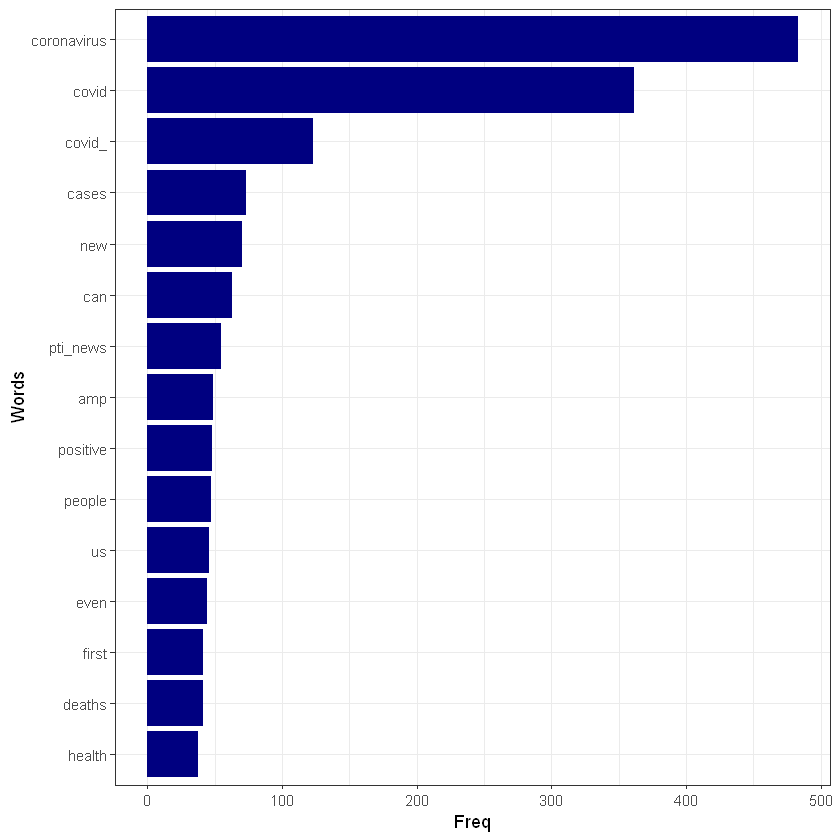

In [64]:
tab3 %>% head(15) %>%  ggplot(aes(x = reorder(word,Freq),y = Freq))+geom_bar(stat = "identity",fill="navyblue")+xlab("Words")+theme_bw()+coord_flip()


# top 15 tweets done in the twitter dataset

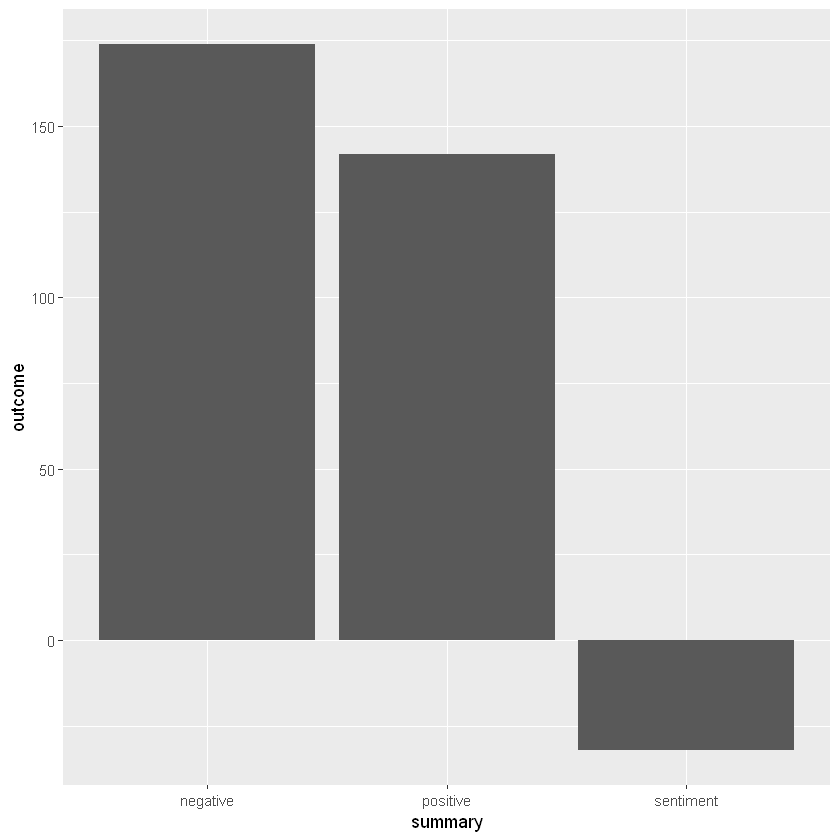

In [68]:
sentiments_1 <- data.frame(summary = c("positive", "negative", "sentiment"), outcome = c(142, 174, -32))
ggplot(sentiments_1, aes(summary, outcome)) + geom_col()

# This is the visual representation of sentiments on covid-19 data from twitter data.